In [8]:
import numpy as np
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'
from sklearn.model_selection import train_test_split

In [20]:
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1).astype(int)
x_test_ = np.load(folder+'test_images.npy')
y_test = np.loadtxt('test_labels.csv', delimiter=',', skiprows=1)
x_train__, x_valid__, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [6]:
from sklearn import manifold
from time import time
import matplotlib.pyplot as plt
from matplotlib import offsetbox
plt.rcParams['figure.figsize']=(20, 10)
# Scale and visualize the embedding vectors
def plot_embedding(X, Image, Y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(Y[i]),
                 color=plt.cm.Set1(Y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(Image[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [22]:
y_train[:10]

array([0, 2, 7, 4, 2, 1, 3, 2, 1, 4])

In [38]:
from keras.utils import to_categorical

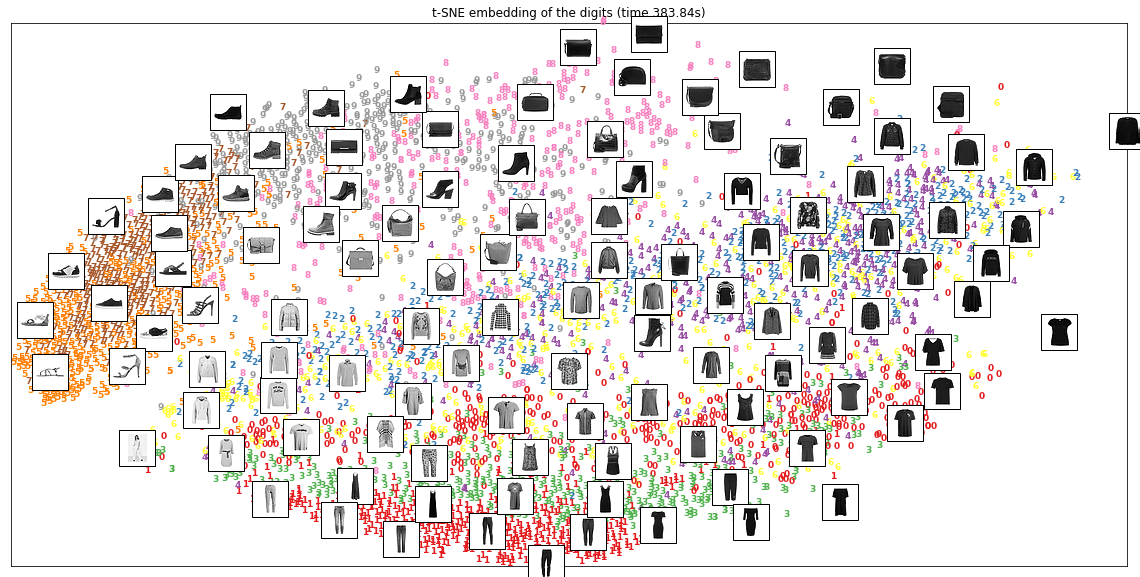

In [226]:
sampleSize=5000
samples=np.random.choice(range(len(y_train)), size=sampleSize)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
sample_images = x_train__[samples].reshape(-1, 28*28)
sample_targets = y_train[samples]
X_tsne = tsne.fit_transform(sample_images)
t1 = time()
plot_embedding(X_tsne, sample_images.reshape(sample_targets.shape[0], 28, 28), sample_targets,
               "t-SNE embedding of the digits (time %.2fs)" %
               (t1 - t0))
plt.show()

In [24]:
X_tsne.shape

(1000, 2)

In [25]:
import keras

Using TensorFlow backend.


In [222]:
initializer_default = keras.initializers.normal(0, 0.1)
#initializer_default = 'zeros'
model = keras.models.Sequential()
model.add(keras.layers.BatchNormalization(input_shape=(2,)))
model.add(keras.layers.Dense(200, kernel_initializer=initializer_default, activation='relu'))
model.add(keras.layers.Dense(200, kernel_initializer=initializer_default, activation='relu'))
#model.add(keras.layers.Dense(200, kernel_initializer=initializer_default))
#model.add(keras.layers.Dense(200, input_shape=(2,), kernel_initializer=initializer_default))
model.add(keras.layers.Dense(10, kernel_initializer=initializer_default, activation='softmax'))
adam = keras.optimizers.Adam(lr=0.01, decay=0.00) #decay=1e-4
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_34 (Batc (None, 2)                 8         
_________________________________________________________________
dense_95 (Dense)             (None, 200)               600       
_________________________________________________________________
dense_96 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_97 (Dense)             (None, 10)                2010      
Total params: 42,818
Trainable params: 42,814
Non-trainable params: 4
_________________________________________________________________


In [225]:
from keras.callbacks import ModelCheckpoint 
#from fnn_helper import PlotLosses
#plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_valid, y_val_categorical=y_val_categorical)
# checkpointer = ModelCheckpoint(filepath='tsne-regress.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
model.fit(X_tsne, 
          to_categorical(sample_targets),
          epochs=50, batch_size=256, 
          #verbose=1, 
          #validation_data=(x_valid, y_val_categorical), 
          # callbacks=[plot_losses], #checkpointer
         )

Epoch 1/50
1000/1000 [==============================] - 0s 49us/step - loss: 0.8226 - acc: 0.6540
Epoch 2/50
1000/1000 [==============================] - 0s 48us/step - loss: 0.7699 - acc: 0.6790
Epoch 3/50
1000/1000 [==============================] - 0s 46us/step - loss: 0.7623 - acc: 0.6730
Epoch 4/50
1000/1000 [==============================] - 0s 46us/step - loss: 0.7515 - acc: 0.7010
Epoch 5/50
1000/1000 [==============================] - 0s 44us/step - loss: 0.7463 - acc: 0.6840
Epoch 6/50
1000/1000 [==============================] - 0s 45us/step - loss: 0.7534 - acc: 0.6890
Epoch 7/50
1000/1000 [==============================] - 0s 39us/step - loss: 0.8029 - acc: 0.6710
Epoch 8/50
1000/1000 [==============================] - 0s 49us/step - loss: 0.8087 - acc: 0.6530
Epoch 9/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.7602 - acc: 0.6760
Epoch 10/50
1000/1000 [==============================] - 0s 47us/step - loss: 0.7637 - acc: 0.6640
Epoch 11/50
1000/10